In [1]:
# Connecting Google Drive with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [3]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/assignment_hacktive8/Phase_2/FP/Final_Project/Combined_News_DJIA.csv', encoding = 'ISO-8859-1')

In [4]:
df.shape

(1989, 27)

# **Exploring the dataset**

In [ ]:
df.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

In [ ]:
df.shape

(1989, 27)

In [ ]:
df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


*Note: Here 'Label' is a binary attribute which consists 0 - Stock 
price goes down or stays the same, 1 - Stock price goes up.*

In [ ]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

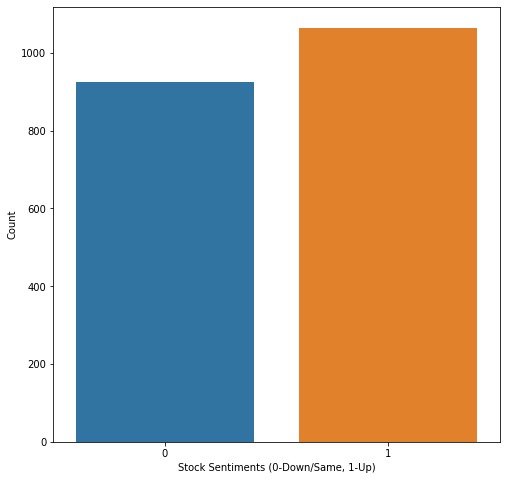

In [ ]:
# Visualizing the count of 'Label' column from the dataset
plt.figure(figsize=(8,8))
sns.countplot(x='Label', data=df)
plt.xlabel('Stock Sentiments (0-Down/Same, 1-Up)')
plt.ylabel('Count')
plt.show()

# **Data Cleaning and Preprocessing**

In [ ]:
print(df.shape)

(1989, 27)


In [ ]:
# Finding any NaN values
df.isna().any()

Date     False
Label    False
Top1     False
Top2     False
Top3     False
Top4     False
Top5     False
Top6     False
Top7     False
Top8     False
Top9     False
Top10    False
Top11    False
Top12    False
Top13    False
Top14    False
Top15    False
Top16    False
Top17    False
Top18    False
Top19    False
Top20    False
Top21    False
Top22    False
Top23     True
Top24     True
Top25     True
dtype: bool

In [ ]:
# Dropping NaN values
df.dropna(inplace=True)
print(df.shape)

(1986, 27)


In [ ]:
df_copy = df.copy()
df_copy = df_copy.drop(['Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'], axis=1)

In [ ]:
df_copy.reset_index(inplace=True)

In [ ]:
# Splitting the dataset into train an test set
train = df_copy[df_copy['Date'] < '20150101']
test = df_copy[df_copy['Date'] > '20141231']
print('Train size: {}, Test size: {}'.format(train.shape, test.shape))

Train size: (1860, 6), Test size: (378, 6)


In [ ]:
train.columns

Index(['index', 'Date', 'Label', 'Top1', 'Top2', 'Top3'], dtype='object')

In [ ]:
# Splitting the dataset
y_train = train['Label']
train = train.iloc[:, 3:28]
y_test = test['Label']
test = test.iloc[:, 3:28]

In [ ]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Removing punctuation and special character from the text
train.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)
test.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)

In [ ]:
# Renaming columns
new_columns = [str(i) for i in range(0,3)]
train.columns = new_columns
test.columns = new_columns

In [ ]:
# Converting the entire text to lower case
for i in new_columns:
  train[i] = train[i].str.lower()
  test[i] = test[i].str.lower()

In [ ]:
# Joining all the columns
train_headlines = []
test_headlines = []

for row in range(0, train.shape[0]):
  train_headlines.append(' '.join(str(x) for x in train.iloc[row, 0:25]))

for row in range(0, test.shape[0]):
  test_headlines.append(' '.join(str(x) for x in test.iloc[row, 0:25]))

In [ ]:
train_headlines[0]

'b georgia  downs two russian warplanes  as countries move to brink of war  b breaking  musharraf to be impeached   b russia today  columns of troops roll into south ossetia  footage from fighting  youtube  '

In [ ]:
test_headlines[0]

'most cases of cancer are the result of sheer bad luck rather than unhealthy lifestyles  diet or even inherited genes  new research suggests  random mutations that occur in dna when cells divide are responsible for two thirds of adult cancers across a wide range of tissues  iran dismissed united states efforts to fight islamic state as a ploy to advance u s  policies in the region   the reality is that the united states is not acting to eliminate daesh  they are not even interested in weakening daesh  they are only interested in managing it  poll  one in   germans would join anti muslim marches'

In [ ]:
# Creating corpus of train dataset
ps = PorterStemmer()
train_corpus = []

for i in range(0, len(train_headlines)):
  
  # Tokenizing the news-title by words
  words = train_headlines[i].split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  headline = ' '.join(words)

  # Building a corpus of news-title
  train_corpus.append(headline)

In [ ]:
# Creating corpus of test dataset
test_corpus = []

for i in range(0, len(test_headlines)):
  
  # Tokenizing the news-title by words
  words = test_headlines[i].split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  headline = ' '.join(words)

  # Building a corpus of news-title
  test_corpus.append(headline)

In [ ]:
train_corpus[0:10]

['b georgia down two russian warplan countri move brink war b break musharraf impeach b russia today column troop roll south ossetia footag fight youtub',
 'b wont america nato help us wont help us help iraq b bush put foot georgian conflict b jewish georgian minist thank isra train fend russia',
 'b rememb ador year old sang open ceremoni fake b russia end georgia oper b sexual harass would children',
 'b u refus israel weapon attack iran report b presid order attack tskhinvali capit south ossetia knew doom come realiz b israel clear troop kill reuter cameraman',
 'b expert admit legalis drug b war south osetia pictur made russian soldier b swedish wrestler ara abrahamian throw away medal olymp hissi fit',
 'b mom miss gay man bad year old cheerlead still look b russia u poland missil deal go unpunish b govern accus creat law chill effect freedom express uk critic report un committe human right',
 'b afghan prison major femal prison serv year sentenc victim rape b littl girl ugli b pa

In [ ]:
test_corpus[0:10]

['case cancer result sheer bad luck rather unhealthi lifestyl diet even inherit gene new research suggest random mutat occur dna cell divid respons two third adult cancer across wide rang tissu iran dismiss unit state effort fight islam state ploy advanc u polici region realiti unit state act elimin daesh even interest weaken daesh interest manag poll one german would join anti muslim march',
 'moscow gt beij high speed train reduc trip time hour current day two ancient tomb discov egypt sunday one repres symbol burial site god osiri anoth claim previous unknown pharaon tomb china complain pyongyang n korean soldier kill villag world news',
 'us oil fall barrel toyota give away fuel cell patent build game chang car futur young indian coupl grant polic protect rel approv hack death offic refus carri judg order',
 'shot fire french magazin hq bibi netanyahu campaign fund u isi behead street magician entertain crowd syria trick',
 'new charli hebdo issu come next week hard suffer grief fe

In [ ]:
down_words = []
for i in list(y_train[y_train==0].index):
  down_words.append(train_corpus[i])

up_words = []
for i in list(y_train[y_train==1].index):
  up_words.append(train_corpus[i])

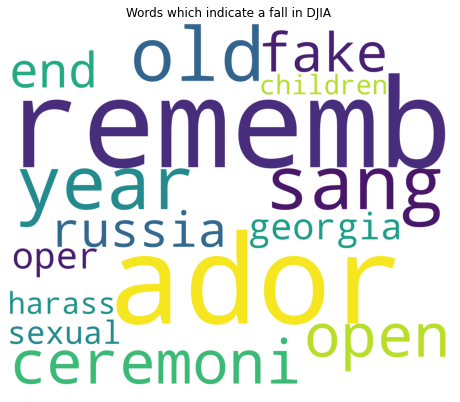

In [ ]:
# Creating wordcloud for down_words
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(down_words[1])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate a fall in DJIA ")
plt.show()

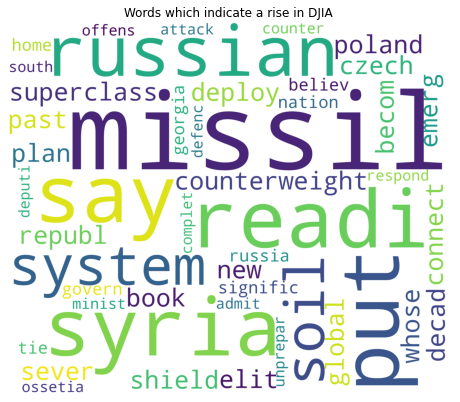

In [ ]:
# Creating wordcloud for up_words
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(up_words[5])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate a rise in DJIA ")
plt.show()

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(2,2))
X_train = cv.fit_transform(train_corpus).toarray()

In [ ]:
X_test = cv.transform(test_corpus).toarray()

# **Model Building**

In [ ]:
accuracy = []
precision = []
recal = []

## *Logistic Regression*

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lr_y_pred = lr_classifier.predict(X_test)

In [ ]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
accuracy.append(score1)
print("Precision score is: {}".format(round(score2,2)))
precision.append(score2)
print("Recall score is: {}".format(round(score3,2)))
recal.append(score3)

---- Scores ----
Accuracy score is: 84.66%
Precision score is: 0.84
Recall score is: 0.86


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)

In [ ]:
lr_cm

array([[155,  31],
       [ 27, 165]])

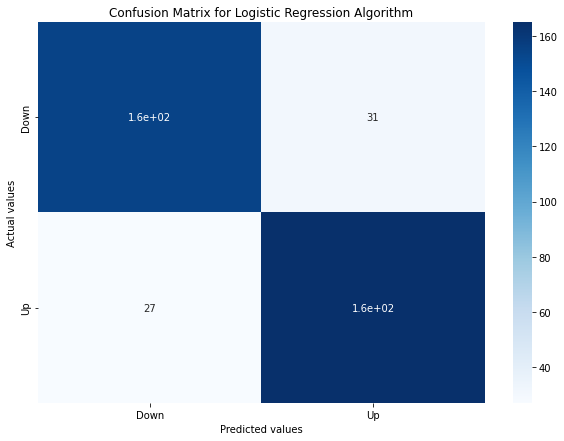

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=lr_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

## *Random Forest Classifier*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
rf_y_pred = rf_classifier.predict(X_test)

In [ ]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, rf_y_pred)
score2 = precision_score(y_test, rf_y_pred)
score3 = recall_score(y_test, rf_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
accuracy.append(score1)
print("Precision score is: {}".format(round(score2,2)))
precision.append(score2)
print("Recall score is: {}".format(round(score3,2)))
recal.append(score3)

---- Scores ----
Accuracy score is: 83.33%
Precision score is: 0.83
Recall score is: 0.84


In [ ]:
# Making the Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)

In [ ]:
rf_cm

array([[156,  30],
       [ 30, 162]])

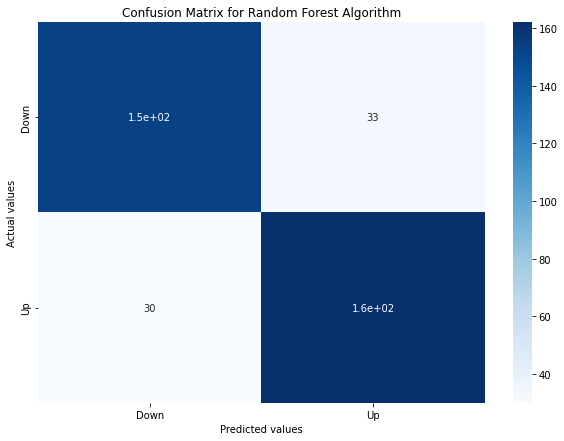

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=rf_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Random Forest Algorithm')
plt.show()

## *Multinomial Naive Bayes*

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [ ]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
accuracy.append(score1)
print("Precision score is: {}".format(round(score2,2)))
precision.append(score2)
print("Recall score is: {}".format(round(score3,2)))
recal.append(score3)

---- Scores ----
Accuracy score is: 85.45%
Precision score is: 0.85
Recall score is: 0.86


In [ ]:
# Making the Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [ ]:
nb_cm

array([[158,  28],
       [ 27, 165]])

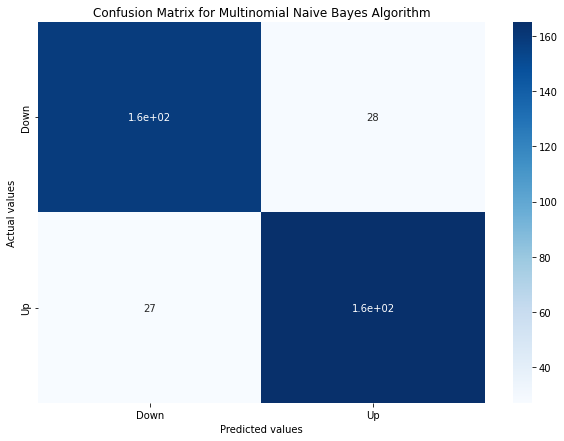

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [ ]:
# add to table
score_table = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest Classifier', 'Multinomial Naive Bayes'],
                          'Accuracy Score' : accuracy,
                          'Precision Score': precision, 
                          'Recall Score': recal})

# Menampilkan 
score_table.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score,Precision Score,Recall Score
2,Multinomial Naive Bayes,0.854497,0.854922,0.859375
0,Logistic Regression,0.846561,0.841837,0.859375
1,Random Forest Classifier,0.833333,0.830769,0.843750


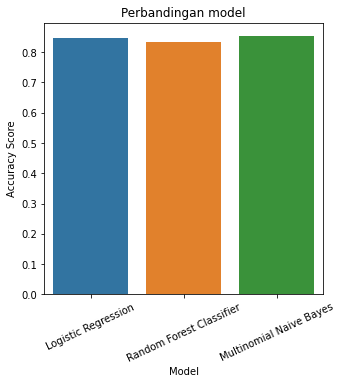

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(data=score_table, x='Model', y='Accuracy Score')
plt.xticks(rotation = 25) # Rotates X-Axis Ticks by 25-degrees
plt.title("Perbandingan model")
plt.show()

## *Neural Network*

In [ ]:
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

max_len = 10000

def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
    inputs = Input(name='inputs',shape=[max_len])#step1
    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dense(256,name='FC1')(layer) #step4
    layer = Activation('relu')(layer) # step5
    layer = Dropout(0.5)(layer) # step6
    layer = Dense(1,name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.
    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification
    return model #function returning the value when we call it

In [ ]:
model = tensorflow_based_model() # here we are calling the function of created model
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,batch_size=80,epochs=6, validation_data=(X_test, y_test))# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/6
24/24 [==============================] - 16s 357ms/step - loss: 0.6914 - accuracy: 0.5328 - val_loss: 0.6960 - val_accuracy: 0.5079
Epoch 2/6
24/24 [==============================] - 8s 335ms/step - loss: 0.6920 - accuracy: 0.5328 - val_loss: 0.6939 - val_accuracy: 0.5079
Epoch 3/6
24/24 [==============================] - 8s 334ms/step - loss: 0.6908 - accuracy: 0.5339 - val_loss: 0.6935 - val_accuracy: 0.5079
Epoch 4/6
24/24 [==============================] - 8s 333ms/step - loss: 0.6922 - accuracy: 0.5290 - val_loss: 0.6947 - val_accuracy: 0.5079
Epoch 5/6
24/24 [==============================] - 8s 336ms/step - loss: 0.6915 - accuracy: 0.5339 - val_loss: 0.6945 - val_accuracy: 0.5079
Epoch 6/6
24/24 [==============================] - 8s 335ms/step - loss: 0.6916 - accuracy: 0.5333 - val_loss: 0.6937 - val_accuracy: 0.5079
Training finished !!


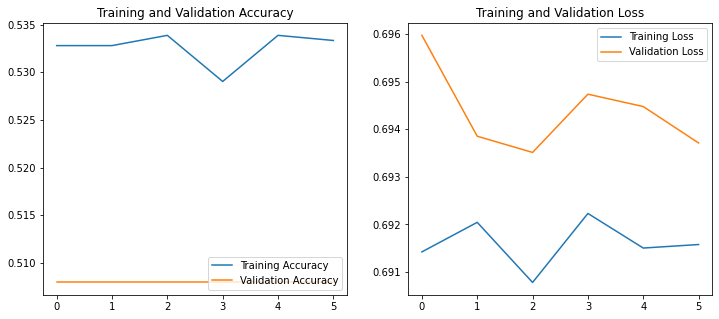

In [ ]:
#Setup Epochs
epochs=6

# define variabel aaccuracy and losses
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

# Create figure
plt.figure(figsize=(12, 5))

# Create Subplot For Model Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Create Subplot FOr Model Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Dari hasil model Neural network di dapatkan hasil overfitting 


# **Predictions**

In [ ]:
import re

def stock_prediction(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return nb_classifier.predict(temp)

In [ ]:
# For generating random integer
from random import randint

In [ ]:
sample_test = df_copy[df_copy['Date'] > '20141231']

In [ ]:
sample_test.reset_index(inplace=True)
sample_test = sample_test['Top1']

In [ ]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Palm oil company caught destroying primary forest in endangered ecosystem
Prediction: The stock price will go up!


In [ ]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: France wants to fight terrorism by spying on everyone - Prime minister says proposed surveillance law 'is not a French Patriot Act,' but civil liberties groups say it goes too far
Prediction: The stock price will go up!


In [ ]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Apple: 'FBI could force us to turn on iPhone cameras and microphones'
Prediction: The stock price will remain the same or will go down.


In [ ]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Paris attacks ringleader dead - French officials
Prediction: The stock price will go up!


# **Save models**

In [ ]:
# loading library
import pickle

# create an iterator object with write permission - model.pkl
#with open('model.pkl', 'wb') as files:
 #   pickle.dump(rf_classifier, files)

In [ ]:
# Load model
with open("model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

In [ ]:
# Save vecorizer
with open('vectorizer.pkl', 'wb') as files:
    pickle.dump(cv, files)

In [ ]:
# Save Model Multinomial Naive Bayes
with open('nb_model.pkl', 'wb') as models:
  pickle.dump(nb_classifier, models)

In [ ]:
# Create Fuction
def stock_prediction(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return model.predict(temp)

In [ ]:
train_corpus[1]

'b wont america nato help us wont help us help iraq b bush put foot georgian conflict b jewish georgian minist thank isra train fend russia b georgian armi flee disarray russian advanc gori abandon russia without shot fire b olymp open ceremoni firework fake b mossad fraudul new zealand passport iraq b russia anger isra militari sale georgia b american citizen live ossetia blame u georgian leader genocid innoc peopl b welcom world war iv high definit b georgia move mistak monument proport b russia press deeper georgia u say regim chang goal b abhinav bindra win first ever individu olymp gold medal india b u ship head arctic defin territori b driver jerusalem taxi station threaten quit rather work new boss arab b french team stun phelp x relay team b israel us behind georgian aggress b believ tv neither russian georgian much victim b riot still go montreal canada polic murder boy saturday b china overtak us largest manufactur b war south ossetia pic b isra physician group condemn state 

In [ ]:
# Predicting values
sample_news = test_corpus[2]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: us oil fall barrel toyota give away fuel cell patent build game chang car futur young indian coupl grant polic protect rel approv hack death offic refus carri judg order senior figur islam state self declar polic forc syria carri behead found decapit eastern provinc deir al zor fukushima rice pass radiat test st time sinc disast nearli spanish parti guilti financi crime audit court find king abdullah abdic saudi throne taliban command caught network linkedin mexican miss student mayor wife charg organ crime money launder new york time report jame risen refus monday answer basic question court book detail fail cia effort undermin iran nuclear weapon program case becom flashpoint press freedom korea send sweet potato n korea nutrit aid turkey dutch journalist frederik geerdink detain terror propaganda charg kuala lumpur jan islam prohibit marri men homemak famili govern malaysian institut islam understand ikim said iraqi mp iran top gener qassem suleimani save baghdad fall pakistan